In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# 1. Data Reading

In [2]:
df = pd.read_csv(r"E:\Practice Books\archive\WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
df.shape

(7043, 21)

In [5]:
#Check Unique values of each column
for column in df.columns:
    print('column: {} - Unique Values: {}'.format(column, df[column].unique()))

column: customerID - Unique Values: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
column: gender - Unique Values: ['Female' 'Male']
column: SeniorCitizen - Unique Values: [0 1]
column: Partner - Unique Values: ['Yes' 'No']
column: Dependents - Unique Values: ['No' 'Yes']
column: tenure - Unique Values: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
column: PhoneService - Unique Values: ['No' 'Yes']
column: MultipleLines - Unique Values: ['No phone service' 'No' 'Yes']
column: InternetService - Unique Values: ['DSL' 'Fiber optic' 'No']
column: OnlineSecurity - Unique Values: ['No' 'Yes' 'No internet service']
column: OnlineBackup - Unique Values: ['Yes' 'No' 'No internet service']
column: DeviceProtection - Unique Values: ['No' 'Yes' 'No internet service']
column: TechSuppor

# 2. EDA and Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
# transform the column TotalCharges into a numeric data type
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
# null observations of the TotalCharges column
df[df['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [10]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [11]:
df.dropna(inplace=True)

In [12]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#The customerID column is useless to explain whether not the customer will churn. Therefore, we drop this column from the data set.

In [13]:
df.drop(['customerID'], axis=1, inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [15]:
#Unique elements of payment method column
df['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [16]:
#remove (automatic) keyword from paymentmethod
df['PaymentMethod'] = df['PaymentMethod'].str.replace(' (automatic)', '', regex=False)

In [17]:
#Unique elements of payment method column
df['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer', 'Credit card'],
      dtype=object)

# 3. Data Visualisation

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

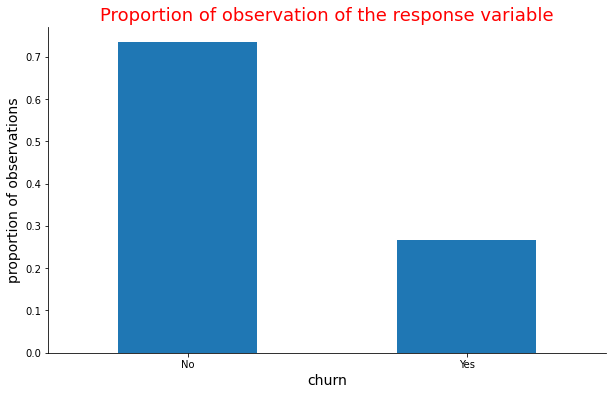

In [19]:
#Create the figure
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

#proportion of observations of each class
prop_response = df['Churn'].value_counts(normalize=True)

#create a bar plot showing percentage of churn
prop_response.plot(kind='bar', ax=ax)

#set title and labels
ax.set_title('Proportion of observation of the response variable', fontsize=18, loc='center',color='red')
ax.set_xlabel('churn', fontsize='14')
ax.set_ylabel('proportion of observations', fontsize='14')
ax.tick_params(rotation='auto')

#eliminate the frame from the plot
spine_names = ('top', 'right')

for spine_name in spine_names:
    ax.spines[spine_name].set_visible(False)

In [20]:
import math

In [21]:
def percentage_stacked_plot(columns_to_plot, super_title):
    
    ...
    #prints a 100% stacked plot of the response variable for independant variable of the list columns_to_plot.
    
    #parameters:
    #       columns_to_plot (list of string): Names of the variables to plot
    #       super_title (string): Super title of the visualisation
    
    #Returns:
    #       None
    ...
    
    no_of_columns = 2
    no_of_rows = math.ceil(len(columns_to_plot)/2)
    
    #create a figure
    fig = plt.figure(figsize=(12, 5*no_of_rows))
    fig.suptitle(super_title, fontsize=22, y=.95)
    
    # loop to each column name to create a subplot
    for index, column in enumerate (columns_to_plot, 1):
        
        #Create the subplot
        ax = fig.add_subplot(no_of_rows, no_of_columns, index)
        
        # calculate the percentage of observations of the responsible variable for each group of the independant variable
        # 100% stacked bar plot
        
        prop_by_independent = pd.crosstab(df[column], df['Churn']).apply(lambda x: x/x.sum()*100, axis=1)
        
        prop_by_independent.plot(kind='bar', ax = ax, stacked=True, rot=0, color=['springgreen', 'salmon'])
        
        #set the legend in the upper right corner
        ax.legend(loc='upper right', bbox_to_anchor=(0.6, 0.5,0.5,0.5), title='Churn', fancybox=True)
        
        #set the titles and labels
        ax.set_title('Proportion of observations by ' + column, fontsize=16, loc='left')
        
        ax.tick_params(rotation='auto')
        
        #eliminate the frame from the plot
        spine_names = ['top', 'right', 'bottom', 'left']
        
        for spine_name in spine_names:
            ax.spines[spine_name].set_visible(False)

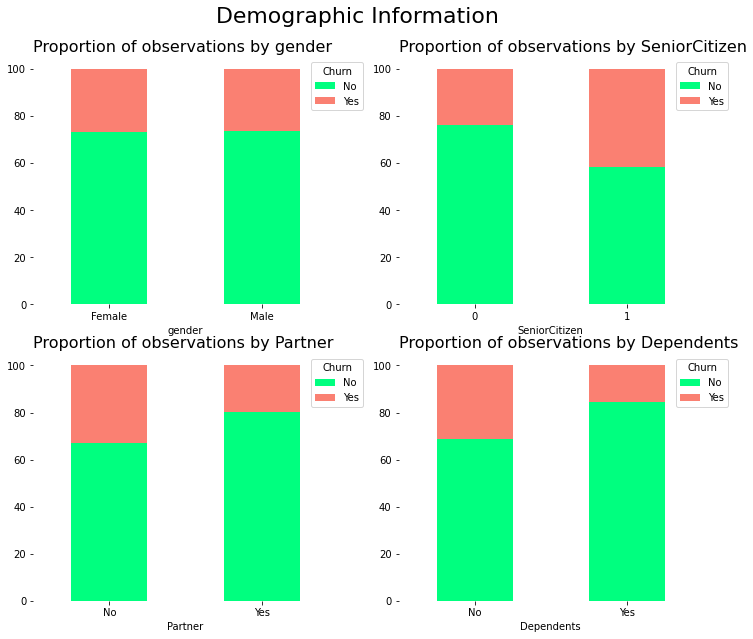

In [22]:
#demograhic column names
demographic_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

#stacked plot of demographic columns
percentage_stacked_plot(demographic_columns, 'Demographic Information')

As shown above, each bar is a category of the independent variable, and it is subdivided to show the proportion of each response class (No and Yes).

We can extract the following conclusions by analyzing demographic attributes:

The churn rate of senior citizens is almost double that of young citizens.

We do not expect gender to have significant predictive power. A similar percentage of churn is shown both when a customer is a man or a woman.

Customers with a partner churn less than customers with no partner.

<BarContainer object of 7032 artists>

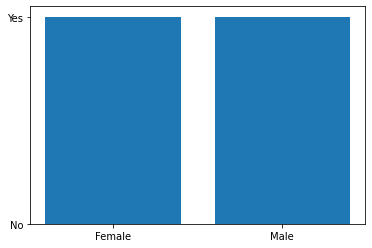

In [23]:
plt.bar('gender', 'Churn', data = df)

In [24]:
stack_data = df.groupby(['Churn', 'gender']).size().unstack().T

In [25]:
stack_data

Churn,No,Yes
gender,,
Female,2544,939
Male,2619,930


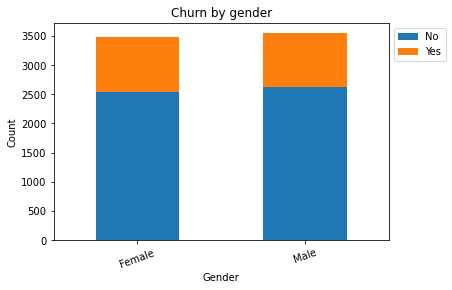

In [26]:
stack_data.plot(kind='bar', stacked=True)

plt.title('Churn by gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.xticks(rotation=20)
plt.show()

### Customer Account Information — Categorical variables

In [27]:
df.select_dtypes('object').columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

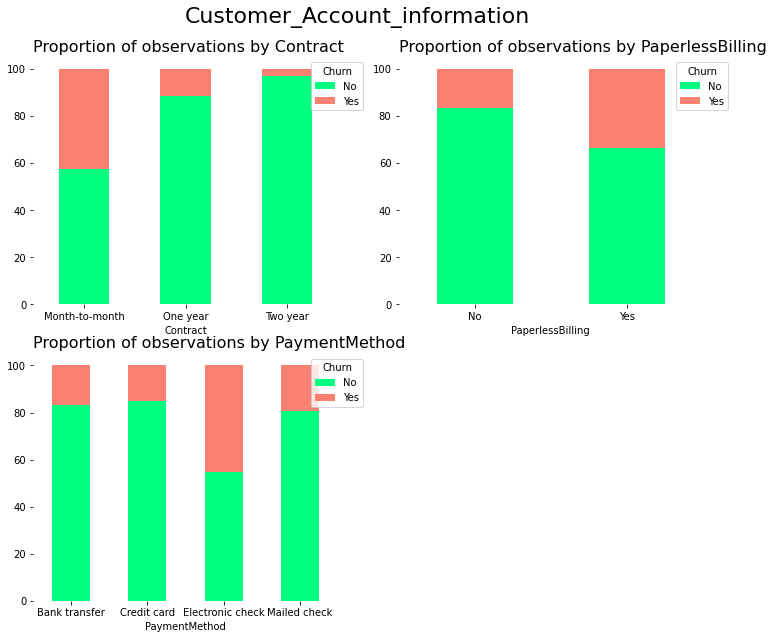

In [28]:
#customer account column name
account_columns = ['Contract', 'PaperlessBilling', 'PaymentMethod']

#stacked plot of customer account column names
percentage_stacked_plot(account_columns, 'Customer_Account_information')

We can extract the following conclusions by analyzing customer account attributes:

Customers with month-to-month contracts have higher churn rates compared to clients with yearly contracts.

Customers who opted for an electronic check as paying method are more likely to leave the company.

Customers subscribed to paperless billing churn more than those who are not subscribed.

### Customer Account Information — Numerical variables

In [29]:
def histogram_plots(columns_to_plot, super_title):
    
    #set no of rows and columns
    no_of_columns = 2
    no_of_rows = math.ceil(len(columns_to_plot)/2)
    
    #create a figure
    fig = plt.figure(figsize=(12, 5*no_of_rows))
    fig.suptitle(super_title, fontsize=20, y=.95)
    
    #loop to each demographic column name to create a subplot
    for index, column in enumerate(columns_to_plot, 1):
        
        #create the subplot
        ax = fig.add_subplot(no_of_rows, no_of_columns, index)
        
        #histograms for each class (normalised histogram)
        df[df['Churn']=='No'][column].plot(kind='hist', ax=ax, density=True, alpha=0.5, color='springgreen', label='No')
        df[df['Churn']=='Yes'][column].plot(kind='hist', ax=ax, density=True, alpha=0.5, color='salmon', label='Yes')
        
        #set the legend in the upper right corner
        ax.legend(loc='upper right', bbox_to_anchor=(0.5,0.5,0.5,0.5), title='Churn', fancybox=True)
                  
        #set title and labels
        ax.set_title('Distribution of ' + column + ' by churn', fontsize=16, loc='left')
        ax.tick_params(rotation='auto')
                  
        #eliminate the frame from the plot
        spine_names=('top', 'right', 'bottom', 'left')
        for spine_name in spine_names:
            ax.spines[spine_name].set_visible(False)
            
                

In [30]:
#customer account column names
account_columns_numeric= ['tenure', 'MonthlyCharges', 'TotalCharges']

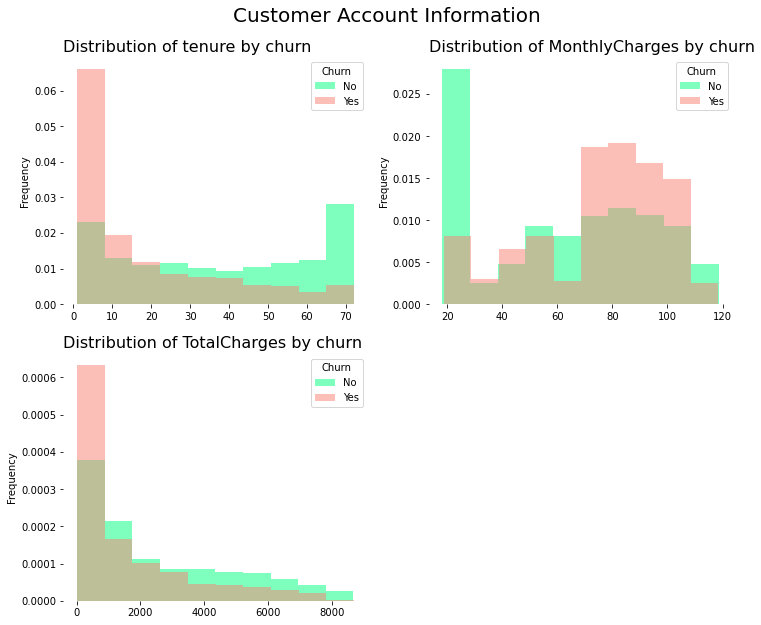

In [31]:
histogram_plots(account_columns_numeric, 'Customer Account Information')

We can extract the following conclusions by analyzing the histograms above:

The churn rate tends to be larger when monthly charges are high.

New customers (low tenure) are more likely to churn.

Clients with high total charges are less likely to leave the company.

### Services Information

In [32]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [33]:
#Service column names
service_columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

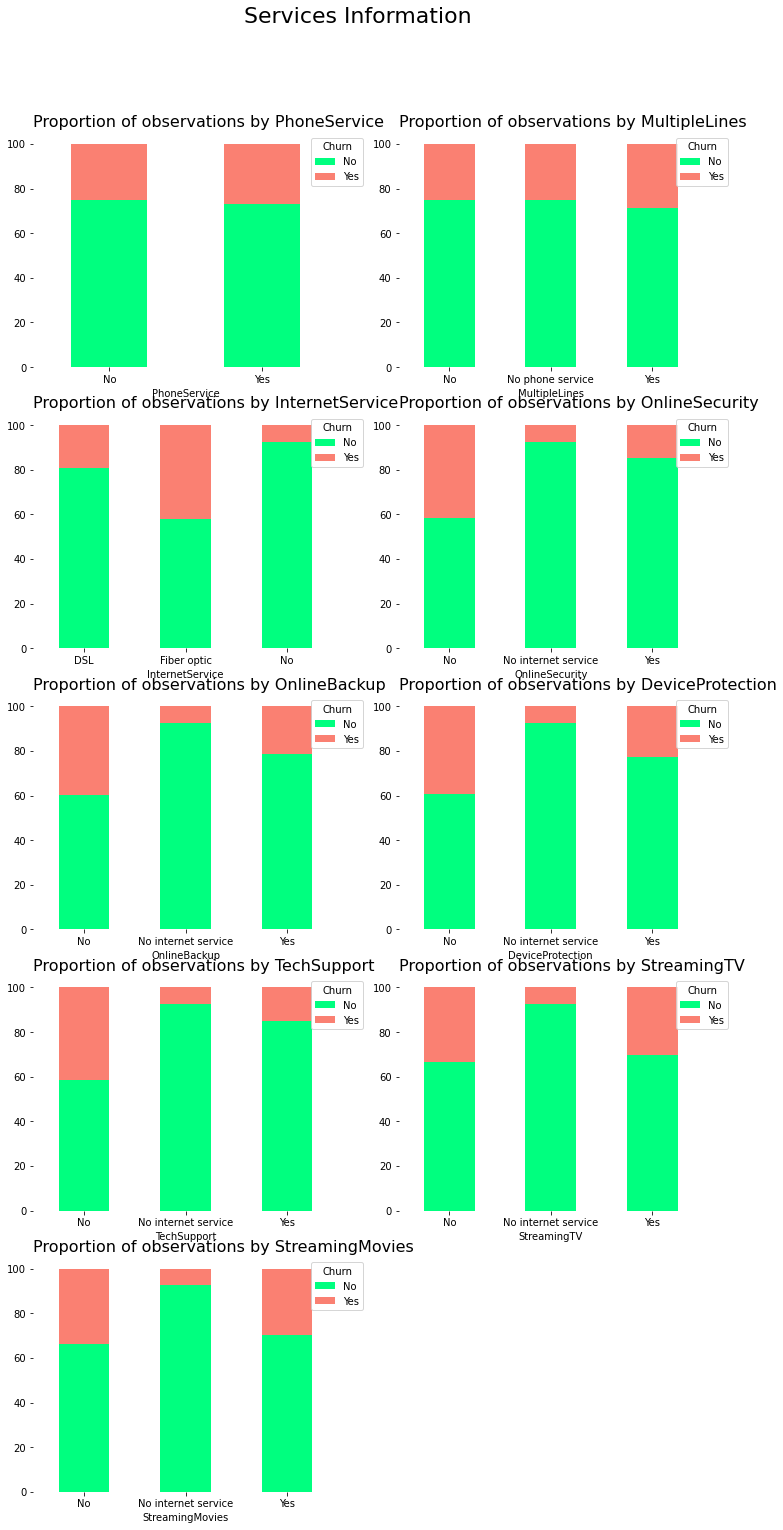

In [34]:
#stacked plot of service columns
percentage_stacked_plot(service_columns, 'Services Information')

We can extract the following conclusions by evaluating services attributes:

We do not expect phone attributes (PhoneService and MultipleLines) to have significant predictive power. The percentage of churn for all classes in both independent variables is nearly the same.

Clients with online security churn less than those without it.

Customers with no tech support tend to churn more often than those with tech support.

By looking at the plots above, we can identify the most relevant attributes for detecting churn. We expect these attributes to be discriminative in our future models.

# 4. Feature Importance

Mutual information — analysis of linear and nonlinear relationships

Mutual information measures the mutual dependency between two variables based on entropy estimations. In machine learning, we are interested in evaluating the degree of dependency between each independent variable and the response variable. Higher values of mutual information show a higher degree of dependency which indicates that the independent variable will be useful for predicting the target.

The Scikit-Learn library has implemented mutual information in the metrics package. The following code computes the mutual information score between each categorical variable of the data set and the Churn variable.

In [35]:
from sklearn.metrics import mutual_info_score

#function that computes the mutual information score between the categorical features and the column churn

def compute_mutual_information(categorical_fea):
    return mutual_info_score(categorical_fea, df.Churn)

#select Categorical variables excluding the responsible variable
categorical_var = df.select_dtypes('object').drop('Churn', axis=1)

#compute the mutual information score between each of the categorical variable and target 
feature_importance = categorical_var.apply(compute_mutual_information).sort_values(ascending=False)

print(feature_importance)

Contract            0.098182
OnlineSecurity      0.064528
TechSupport         0.062873
InternetService     0.055394
OnlineBackup        0.046659
PaymentMethod       0.044423
DeviceProtection    0.043784
StreamingMovies     0.031918
StreamingTV         0.031803
PaperlessBilling    0.019119
Dependents          0.014270
Partner             0.011383
MultipleLines       0.000798
PhoneService        0.000069
gender              0.000037
dtype: float64


Mutual information allows us not only to better understand our data but also to identify the predictor variables that are completely independent of the target. As shown above, gender, PhoneService, and MultipleLines have a mutual information score really close to 0, meaning those variables do not have a strong relationship with the target. This information is in line with the conclusions we have previously drawn by visualizing the data. In the following steps, we should consider removing those variables from the data set before training as they do not provide useful information for predicting the outcome.

In [36]:
feature_importance = pd.DataFrame(feature_importance).reset_index()

In [37]:
feature_importance

,index,0
0,Contract,0.098182
1,OnlineSecurity,0.064528
2,TechSupport,0.062873
3,InternetService,0.055394
4,OnlineBackup,0.046659
5,PaymentMethod,0.044423
6,DeviceProtection,0.043784
7,StreamingMovies,0.031918
8,StreamingTV,0.031803
9,PaperlessBilling,0.019119


In [38]:
feature_importance = feature_importance.rename(columns={'index':'Feature_name', 0:'Mutual_score'})

In [39]:
feature_importance

,Feature_name,Mutual_score
0,Contract,0.098182
1,OnlineSecurity,0.064528
2,TechSupport,0.062873
3,InternetService,0.055394
4,OnlineBackup,0.046659
5,PaymentMethod,0.044423
6,DeviceProtection,0.043784
7,StreamingMovies,0.031918
8,StreamingTV,0.031803
9,PaperlessBilling,0.019119


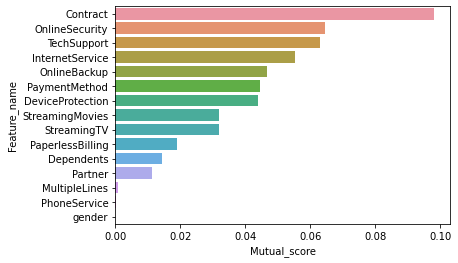

In [40]:
sns.barplot('Mutual_score', 'Feature_name', data=feature_importance)
plt.show()

The mutual information extends the notion of correlation to nonlinear relationships since, unlike Pearson’s correlation coefficient, this method is able to detect not only linear relationships but also nonlinear ones.

<AxesSubplot:>

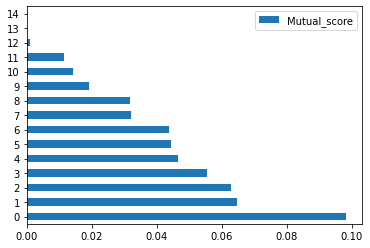

In [41]:
feature_importance.plot(kind='barh')

# 5. Feature Engineering

Feature engineering is the process of extracting features from the data and transforming them into a format that is suitable for the machine learning model. In this project, we need to transform both numerical and categorical variables. Most machine learning algorithms require numerical values; therefore, all categorical attributes available in the dataset should be encoded into numerical labels before training the model. In addition, we need to transform numeric columns into a common scale. This will prevent that the columns with large values dominate the learning process. The techniques implemented in this project are described in more detail below. All transformations are implemented using only Pandas; however, we also provide an alternative implementation using Scikit-Learn. As you can see, there are multiple ways to solve the same problem

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


### No modification
The SeniorCitizen column is already a binary column and should not be modified.

In [43]:
char_var = df.select_dtypes('object').columns
char_var

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

### Label Encoding
Label encoding is used to replace categorical values with numerical values. This encoding replaces every category with a numerical label. In this project, we use label encoding with the following binary variables: (1) gender, (2) Partner, (3) Dependents, (4)PaperlessBilling, (5)PhoneService , and (6)Churn .

In [44]:
df_transformed = df.copy()

# label encoding (binary variables)
label_encoding_columns = ['gender', 'Partner', 'Dependents', 'PaperlessBilling', 'PhoneService', 'Churn']

# encode categorical binary features using label encoding
for column in label_encoding_columns:
    if column == 'gender':
        df[column] = df[column].map({'Female': 1, 'Male': 0})
    else: 
        df[column] = df[column].map({'Yes': 1, 'No': 0}) 

### One-Hot Encoding

One-hot encoding creates a new binary column for each level of the categorical variable. The new column contains zeros and ones indicating the absence or presence of the category in the data. In this project, we apply one-hot encoding to the following categorical variables: (1) Contract, (2) PaymentMethod, (3) MultipleLines, (4) InternetServices, (5) OnlineSecurity, (6) OnlineBackup, (7) DeviceProtection, (8) TechSupport, (9) StreamingTV, and (10)StreamingMovies.

In [45]:
# one hot encoding (categorical variables with more than two levels)
one_hot_encoding_columns = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                            'TechSupport', 'StreamingTV',  'StreamingMovies', 'Contract', 'PaymentMethod']

#encode categorical variables with more than two levels using one-hot encoding
df = pd.get_dummies(df, columns=one_hot_encoding_columns)


The main drawback of this encoding is the significant increase in the dimensionality of the dataset (curse of dimensionality); therefore, this method should be avoided when the categorical column has a large number of unique values.

### Label Encoding
Label encoding is used to replace categorical values with numerical values. This encoding replaces every category with a numerical label. 

In [46]:
#from sklearn.preprocessing import LabelEncoder
#LE = LabelEncoder()

In [47]:
#for column in char_var:
#    print('Column: {} - Unique Values {}'.format(column, df[column].unique()))

In [48]:
#for column in char_var:
#    df[column] = LE.fit_transform(df[column])

In [49]:
#for column in char_var:
#    print('Column: {} - Unique Values {}'.format(column, df[column].unique()))

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 41 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   gender                                7032 non-null   int64  
 1   SeniorCitizen                         7032 non-null   int64  
 2   Partner                               7032 non-null   int64  
 3   Dependents                            7032 non-null   int64  
 4   tenure                                7032 non-null   int64  
 5   PhoneService                          7032 non-null   int64  
 6   PaperlessBilling                      7032 non-null   int64  
 7   MonthlyCharges                        7032 non-null   float64
 8   TotalCharges                          7032 non-null   float64
 9   Churn                                 7032 non-null   int64  
 10  MultipleLines_No                      7032 non-null   uint8  
 11  MultipleLines_No 

### Normalization

Data Normalization is a common practice in machine learning which consists of transforming numeric columns to a common scale. In machine learning, some feature values differ from others multiple times. The features with higher values will dominate the learning process; however, it does not mean those variables are more important to predict the target. Data normalization transforms multiscaled data to the same scale. After normalization, all variables have a similar influence on the model, improving the stability and performance of the learning algorithm.

There are multiple normalization techniques in statistics. In this project, we will use the min-max method to rescale the numeric columns (tenure, MontlyCharges, and TotalCharges) to a common scale. The min-max approach (often called normalization) rescales the feature to a fixed range of [0,1] by subtracting the minimum value of the feature and then dividing by the range.

In [51]:
#min-max Normalization (numeric Variables)
num_var = ['tenure', 'MonthlyCharges', 'TotalCharges']

df[num_var]

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65
...,...,...,...
7038,24,84.80,1990.50
7039,72,103.20,7362.90
7040,11,29.60,346.45
7041,4,74.40,306.60


In [52]:
#scale numeric variables using min-max Scaler
from sklearn.preprocessing import MinMaxScaler

Sc = MinMaxScaler()

df[num_var] = Sc.fit_transform(df[num_var])

In [53]:
df[num_var]

,tenure,MonthlyCharges,TotalCharges
0,0.000000,0.115423,0.001275
1,0.464789,0.385075,0.215867
2,0.014085,0.354229,0.010310
3,0.619718,0.239303,0.210241
4,0.014085,0.521891,0.015330
...,...,...,...
7038,0.323944,0.662189,0.227521
7039,1.000000,0.845274,0.847461
7040,0.140845,0.112935,0.037809
7041,0.042254,0.558706,0.033210


# 6. Setting a baseline
In machine learning, we often use a simple classifier called baseline to evaluate the performance of a model. In this classification problem, the rate of customers that did not churn (most frequent class) can be used as a baseline to evaluate the quality of the models generated. These models should outperform the baseline capabilities to be considered for future predictions.

# 7. Splitting the data in training and testing sets
The first step when building a model is to split the data into two groups, which are typically referred to as training and testing sets. The training set is used by the machine learning algorithm to build the model. The test set contains samples that are not part of the learning process and is used to evaluate the model’s performance. It is important to assess the quality of the model using unseen data to guarantee an objective evaluation.

First, we create a variable X to store the independent attributes of the dataset. Additionally, we create a variable y to store only the target variable (Churn).

In [54]:
X = df.drop('Churn', axis=1)

y = df.Churn

print(X.columns)
print(y.name)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer',
       'PaymentMethod_Credit card', 'Paym

Now we divide data into train and test 

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40, shuffle=True)

# 8. Assessing multiple algorithms

Algorithm selection is a key challenge in any machine learning project since there is not an algorithm that is the best across all projects. Generally, we need to evaluate a set of potential candidates and select for further evaluation those that provide better performance.

In this project, we compare 6 different algorithms, all of them already implemented in Scikit-Learn.

Dummy classifier (baseline)
K Nearest Neighbours
Logistic Regression
Support Vector Machines
Random Forest
Gradiente Boosting

In [56]:
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [57]:
def Create_models(seed=40):
    models = []
    
    models.append(('dummy_classifier', DummyClassifier(random_state=seed, strategy='most_frequent')))
    models.append(('k_nearest_neighbors', KNeighborsClassifier()))
    models.append(('logistic_regression', LogisticRegression(random_state=seed)))
    models.append(('support_vectors_machine', SVC(random_state=seed)))
    models.append(('random_forest', RandomForestClassifier(random_state=seed)))
    models.append(("gradient_boosting", GradientBoostingClassifier(random_state=seed)))
    
    return models

In [58]:
#Create a list with all the allgorithms we are going to access

models = Create_models()

In [59]:
models

[('dummy_classifier',
  DummyClassifier(random_state=40, strategy='most_frequent')),
 ('k_nearest_neighbors', KNeighborsClassifier()),
 ('logistic_regression', LogisticRegression(random_state=40)),
 ('support_vectors_machine', SVC(random_state=40)),
 ('random_forest', RandomForestClassifier(random_state=40)),
 ('gradient_boosting', GradientBoostingClassifier(random_state=40))]

Now test the accuracy of the each using with default hyperparameter values

In [60]:
from sklearn.metrics import accuracy_score

In [61]:
results = []
names = []

scoring = 'accuracy'

for name, model in models:
    # fit the model with the training data
    model.fit(X_train, y_train)
    
    # make predictions with the testing data
    predictions = model.predict(X_test)
    
    # calculate accuracy
    accuracy = accuracy_score(y_test, predictions)
    
    # append the model name and accuracy to the list 
    results.append(accuracy)
    names.append(name)
    
    # print classifier accuracy
    print('Classifier: {}, Accuracy: {}'.format(name, accuracy))

Classifier: dummy_classifier, Accuracy: 0.745164960182025
Classifier: k_nearest_neighbors, Accuracy: 0.7531285551763367
Classifier: logistic_regression, Accuracy: 0.7923777019340159
Classifier: support_vectors_machine, Accuracy: 0.7878270762229806
Classifier: random_forest, Accuracy: 0.7747440273037542
Classifier: gradient_boosting, Accuracy: 0.7963594994311718


It is important to bear in mind that we have trained all the algorithms using the default hyperparameters. The accuracy of many machine learning algorithms is highly sensitive to the hyperparameters chosen for training the model. A more in-depth analysis will include an evaluation of a wider range of hyperparameters (not only default values) before choosing a model (or models) for hyperparameter tuning. Nonetheless, this is out of the scope of this article. In this example, we will only further evaluate the model that presents higher accuracy using the default hyperparameters. As shown above, this corresponds to the gradient boosting model which shows an accuracy of nearly 80%.

# 9. Algorithm selected: Gradient Boosting
Gradient Boosting is a very popular machine learning ensemble method based on a sequential training of multiple models to make predictions. In Gradient Boosting, first, you make a model using a random sample of your original data. After fitting the model, you make predictions and compute the residuals of your model. The residuals are the difference between the actual values and the predictions of the model. Then, you train a new tree based on the residuals of the previous tree, calculating again the residuals of this new model. We repeat this process until we reach a threshold (residual close to 0), meaning there is a very low difference between the actual and predicted values. Finally, you take a sum of all model forecasts (prediction of the data and predictions of the error) to make a final prediction.

We can easily build a gradient boosting classifier with Scikit-Learn using the GradientBoostingClassifier class from the sklearn.ensemble module. After creating the model, we need to train it (using the .fit method) and test its performance by comparing the predictions (.predict method) with the actual class values, as you can see in the code above.

As shown in the Scikit-Learn documentation (link below), the GradientBoostingClassifier has multiple hyperparameters; some of them are listed below:

learning_rate: the contribution of each tree to the final prediction.

n_estimators: the number of decision trees to perform (boosting stages).

max_depth: the maximum depth of the individual regression estimators.

max_features: the number of features to consider when looking for the best split.

min_samples_split: the minimum number of samples required to split an internal node.

The next step consists of finding the combination of hyperparameters that leads to the best classification of our data. This process is called hyperparameter tuning.

# 10. Hyperparameter tuning
Thus far we have split our data into a training set for learning the parameters of the model, and a testing set for evaluating its performance. The next step in the machine learning process is to perform hyperparameter tuning. The selection of hyperparameters consists of testing the performance of the model against different combinations of hyperparameters, selecting those that perform best according to a chosen metric and a validation method.

For hyperparameter tuning, we need to split our training data again into a set for training and a set for testing the hyperparameters (often called validation set). It is a very common practice to use k-fold cross-validation for hyperparameter tuning. The training set is divided again into k equal-sized samples, 1 sample is used for testing and the remaining k-1 samples are used for training the model, repeating the process k times. Then, the k evaluation metrics (in this case the accuracy) are averaged to produce a single estimator.

It is important to stress that the validation set is used for hyperparameter selection and not for evaluating the final performance of our model.


There are multiple techniques to find the best hyperparameters for a model. The most popular methods are (1) grid search, (2) random search, and (3) bayesian optimization. Grid search test all combinations of hyperparameters and select the best performing one. It is a really time-consuming method, particularly when the number of hyperparameters and values to try are really high.

In random search, you specify a grid of hyperparameters, and random combinations are selected where each combination of hyperparameters has an equal chance of being sampled. We do not analyze all combinations of hyperparameters, but only random samples of those combinations. This approach is much more computationally efficient than trying all combinations; however, it also has some disadvantages. The main drawback of random search is that not all areas of the grid are evenly covered, especially when the number of combinations selected from the grid is low.



We can implement random search in Scikit-learn using the RandomSearchCV class from the sklearn.model_selection package.

First of all, we specify the grid of hyperparameter values using a dictionary (grid_parameters) where the keys represent the hyperparameters and the values are the set of options we want to evaluate. Then, we define the RandomizedSearchCV object for trying different random combinations from this grid. The number of hyperparameter combinations that are sampled is defined in the n_iter parameter. Naturally, increasing n_iter will lead in most cases to more accurate results, since more combinations are sampled; however, on many occasions, the improvement in performance won’t be significant.

In [62]:
# define the parameter grid
grid_parameters = {'n_estimators': [80, 90, 100, 110, 115, 120],
                  'max_depth': [3,4,5,6],
                  'max_features': [None, 'auto', 'sqrt', 'log2'],
                  'min_samples_split': [2,3,4,5]}

# define the RandomizedSearchCV class for trying different parameter combinations

from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(estimator = GradientBoostingClassifier(),
                                  param_distributions = grid_parameters,
                                  cv = 5,
                                  n_iter = 150,
                                  n_jobs=-1)

#fitting the model for random search
random_search.fit(X_train, y_train)

# print the best parameters after tuning
print(random_search.best_params_)


{'n_estimators': 80, 'min_samples_split': 4, 'max_features': 'log2', 'max_depth': 3}


After fitting the grid object, we can obtain the best hyperparameters using best_params_attribute. As you can above, the best hyperparameters are:
    
    {'n_estimators': 120, 'min_samples_split': 5, 'max_features': 'sqrt', 'max_depth': 3}

# 11. Performace of the model
The last step of the machine learning process is to check the performance of the model (best hyperparameters ) by using the confusion matrix and some evaluation metrics.

### Confusion matrix
The confusion matrix, also known as the error matrix, is used to evaluate the performance of a machine learning model by examining the number of observations that are correctly and incorrectly classified. Each column of the matrix contains the predicted classes while each row represents the actual classes or vice versa. In a perfect classification, the confusion matrix will be all zeros except for the diagonal. All the elements out of the main diagonal represent misclassifications. It is important to bear in mind that the confusion matrix allows us to observe patterns of misclassification (which classes and to which extend they were incorrectly classified).

In binary classification problems, the confusion matrix is a 2-by-2 matrix composed of 4 elements:

TP (True Positive): number of patients with spine problems that are correctly classified as sick.

TN (True Negative): number of patients without pathologies who are correctly classified as healthy.

FP (False Positive): number of healthy patients that are wrongly classified as sick.

FN (False Negative): number of patients with spine diseases that are misclassified as healthy.


Now that the model is trained, it is time to evaluate its performance using the testing set. First, we use the previous model (gradient boosting classifier with best hyperparameters) to predict the class labels of the testing data (with the predict method). Then, we construct the confusion matrix using the confusion_matrix function from the sklearn.metrics package to check which observations were properly classified. The output is a NumPy array where the rows represent the true values and the columns the predicted classes.

In [63]:
# make the predictions
random_search_predictions = random_search.predict(X_test)

# construct the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, random_search_predictions)

# visualise the confusion matrix
confusion_matrix

array([[1149,  161],
       [ 196,  252]], dtype=int64)

In [64]:
Correctly_classified = 1150+247, 
missclassified = 201+160
Correctly_classified, missclassified

((1397,), 361)

As shown above, 1397 observations of the testing data were correctly classified by the model (1150 True Negatives and 247 True Positives). On the contrary, we can observe 361 misclassifications (160 False positives and 201 False Negatives).

### Evaluation metrics
Evaluating the quality of the model is a fundamental part of the machine learning process. The most used performance evaluation metrics are calculated based on the elements of the confusion matrix.

Accuracy: It represents the proportion of predictions that were correctly classified. Accuracy is the most commonly used evaluation metric; however, it is important to bear in mind that accuracy can be misleading when working with imbalanced datasets.

Sensitivity: It represents the proportion of positive samples (diseased patients) that are identified as such.

Specificity: It represents the proportion of negative samples (healthy patients) that are identified as such.

Precision: It represents the proportion of positive predictions that are actually correct.

We can calculate the evaluation metrics manually using the numbers of the confusion matrix. Alternatively, Scikit-learn has already implemented the function classification_report that provides a summary of the key evaluation metrics. The classification report contains the precision, sensitivity, f1-score, and support (number of samples) achieved for each class.

In [71]:
# print classification report

from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test, random_search_predictions))
print('accuracy Score is: ',accuracy_score(y_test, random_search_predictions))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87      1310
           1       0.61      0.56      0.59       448

    accuracy                           0.80      1758
   macro avg       0.73      0.72      0.73      1758
weighted avg       0.79      0.80      0.79      1758

accuracy Score is:  0.7969283276450512


As shown above, we obtain a sensitivity of 0.55 (248/(200+248)) and a specificity of 0.88 (1154/(1154+156)). The model obtained predicts more accurately customers that do not churn. This should not surprise us at all, since gradient boosting classifiers are usually biased toward the classes with more observations.

As you can observe, hyperparameter tuning has barely increased the accuracy of the model.

# 12. Drawing conclusions — Summary

In this project using the Telco customer Churn dataset. We started by cleaning the data and analyzing it with visualization. Then, to be able to build a machine learning model, we transformed the categorical data into numeric variables (feature engineering). After transforming the data, we tried 6 different machine learning algorithms using default parameters. Finally, we tuned the hyperparameters of the Gradient Boosting Classifier (best performance model) for model optimization, obtaining an accuracy of nearly 80% (close to 6% higher than the baseline).

It is important to stress that the exact steps of a machine learning task vary by project. Although in this project we followed a linear process, machine learning projects tend to be iterative rather than linear processes, where previous steps are often revisited as we learn more about the problem we try to solve.